In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('drugs.csv')

# Mostrar las primeras filas y estructura
print(data.head())
print("\nInformación del dataset:")
print(data.info())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [4]:
le = LabelEncoder()
categorical_cols = ['Sex', 'BP', 'Cholesterol', 'Drug']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    print(f"\nCodificación para {col}:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))

# Separar características y variable objetivo
X = data.drop('Drug', axis=1)
y = data['Drug']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Codificación para Sex:
{'F': 0, 'M': 1}

Codificación para BP:
{'HIGH': 0, 'LOW': 1, 'NORMAL': 2}

Codificación para Cholesterol:
{'HIGH': 0, 'NORMAL': 1}

Codificación para Drug:
{'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}



--- Árbol con criterio Gini (profundidad 3) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         6
           3       0.75      1.00      0.86        18
           4       1.00      1.00      1.00        26

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


IndexError: index 4 is out of bounds for axis 0 with size 4

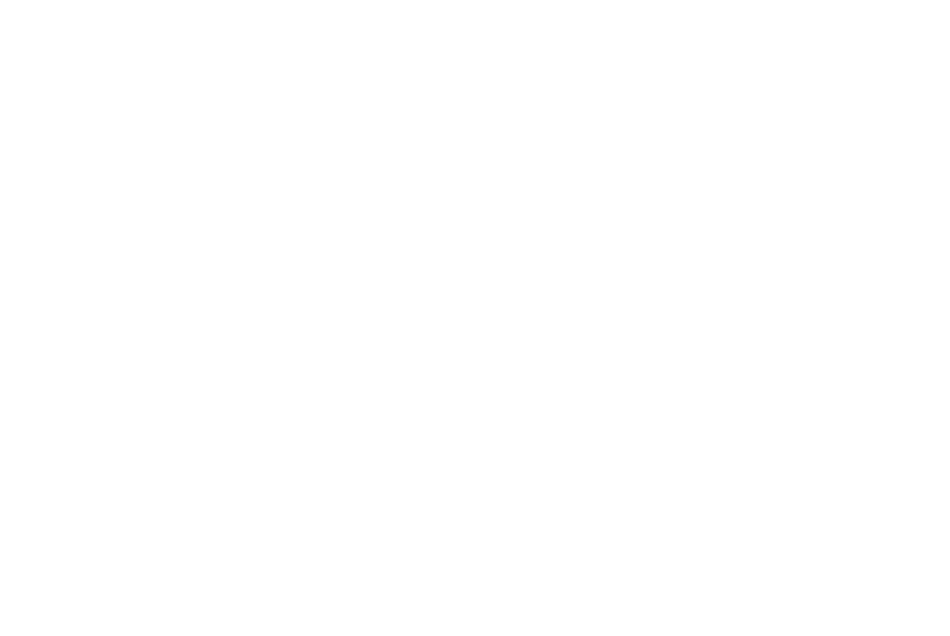

In [6]:
# Probar diferentes profundidades con criterio Gini
for depth in [3, 5, 7, None]:
    print(f"\n--- Árbol con criterio Gini (profundidad {depth}) ---")
    dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt_gini.fit(X_train, y_train)
    
    # Evaluar
    y_pred = dt_gini.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Visualizar el árbol si la profundidad es manejable
    if depth and depth <= 5:
        plt.figure(figsize=(12,8))
        plot_tree(dt_gini, feature_names=X.columns, class_names=le.classes_[:-1], filled=True)
        plt.title(f"Árbol de decisión (Gini, profundidad {depth})")
        plt.show()


--- Árbol con criterio Entropía (profundidad 3) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         6
           3       0.75      1.00      0.86        18
           4       1.00      1.00      1.00        26

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


IndexError: index 4 is out of bounds for axis 0 with size 4

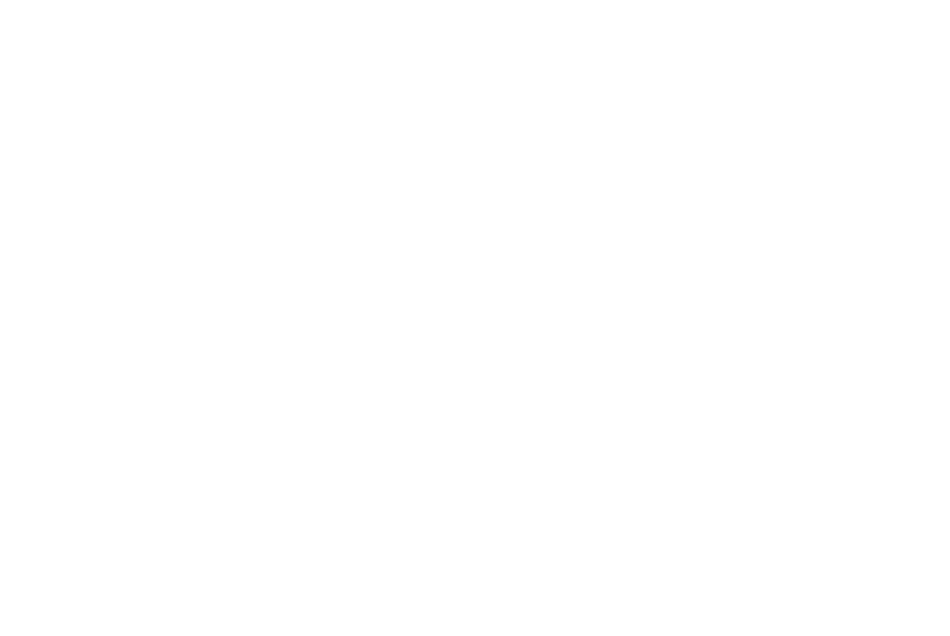

In [8]:
# Probar diferentes profundidades con criterio Entropía
for depth in [3, 5, 7, None]:
    print(f"\n--- Árbol con criterio Entropía (profundidad {depth}) ---")
    dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_entropy.fit(X_train, y_train)
    
    # Evaluar
    y_pred = dt_entropy.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Visualizar el árbol si la profundidad es manejable
    if depth and depth <= 5:
        plt.figure(figsize=(12,8))
        plot_tree(dt_entropy, feature_names=X.columns, class_names=le.classes_[:-1], filled=True)
        plt.title(f"Árbol de decisión (Entropía, profundidad {depth})")
        plt.show()


--- Árbol con criterio Entropía (profundidad 3) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         6
           3       0.75      1.00      0.86        18
           4       1.00      1.00      1.00        26

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


IndexError: index 4 is out of bounds for axis 0 with size 4

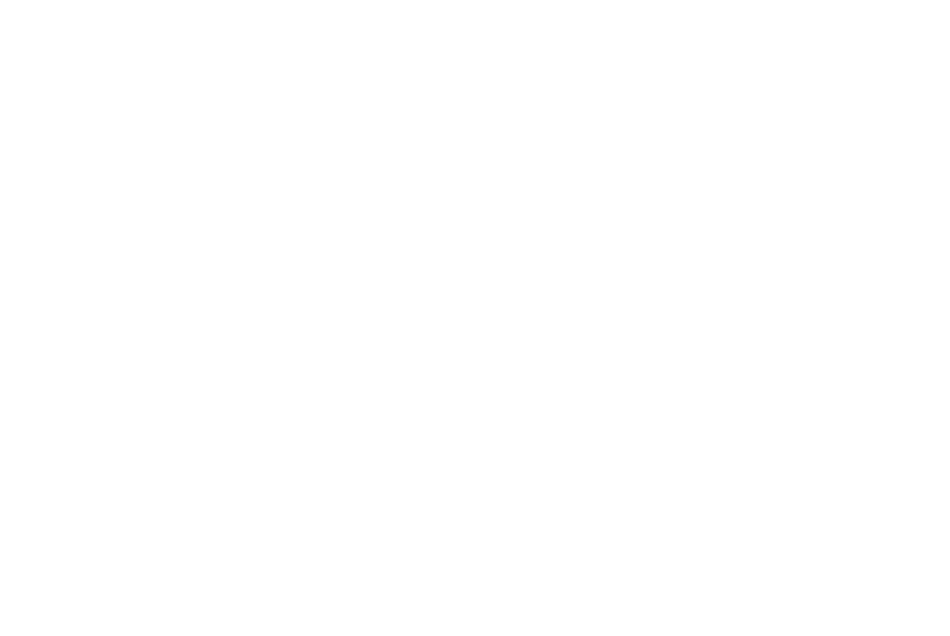

In [10]:
# Probar diferentes profundidades con criterio Entropía
for depth in [3, 5, 7, None]:
    print(f"\n--- Árbol con criterio Entropía (profundidad {depth}) ---")
    dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_entropy.fit(X_train, y_train)
    
    # Evaluar
    y_pred = dt_entropy.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Visualizar el árbol si la profundidad es manejable
    if depth and depth <= 5:
        plt.figure(figsize=(12,8))
        plot_tree(dt_entropy, feature_names=X.columns, class_names=le.classes_[:-1], filled=True)
        plt.title(f"Árbol de decisión (Entropía, profundidad {depth})")
        plt.show()

In [14]:
# Datos del nuevo paciente (ya codificados)
new_patient = {
    'Age': 50,
    'Sex': 0,  
    'BP': 2,   # HIGH codificado
    'Cholesterol': 1,  # NORMAL codificado
    'Na_to_K': 15.302
}

# Convertir a DataFrame
new_df = pd.DataFrame([new_patient])

# Usar el mejor modelo (profundidad 5, criterio Gini)
best_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
best_model.fit(X_train, y_train)

# Predecir y decodificar
predicted_code = best_model.predict(new_df)
predicted_drug = le.inverse_transform(predicted_code)[0]

print(f"\nMedicamento recomendado: {predicted_drug}")


Medicamento recomendado: drugY
